In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('cardata.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [7]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [8]:
df.replace({'Fuel_Type': {'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
df.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)


In [9]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [10]:
X = df.drop(['Car_Name', 'Selling_Price'],axis=1)
Y = df['Selling_Price']
X.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

## USING LINEAR REGRESSION

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [13]:
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
train_pred = lr.predict(X_train)

In [15]:
from sklearn import metrics

In [16]:
error_sc = metrics.r2_score(y_train,train_pred)
print(f"Training Acc : {error_sc}")

Training Acc : 0.8838169193709792


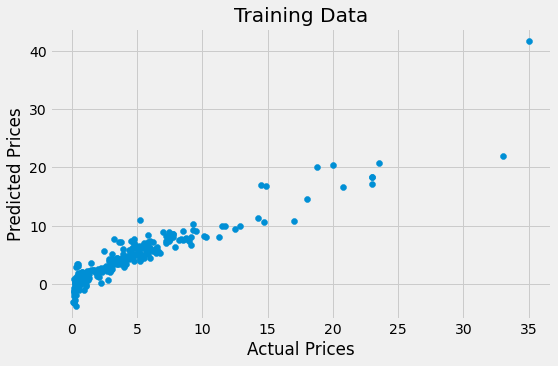

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(y_train,train_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Training Data")
plt.show()


In [18]:
test_pred = lr.predict(X_test)
metrics.accuracy_score
error_sc = metrics.r2_score(y_test, test_pred)
print(f"Testing Acc : {error_sc}")

Testing Acc : 0.8401532365378521


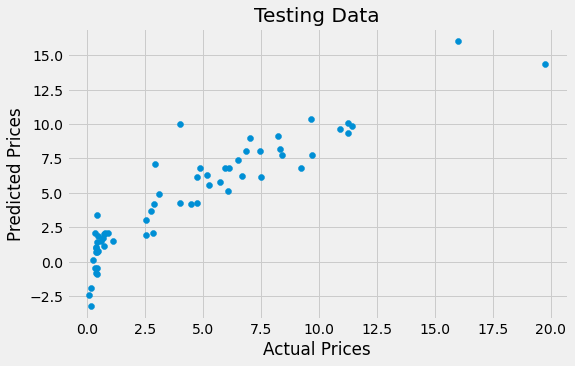

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Testing Data")
plt.show()


In [27]:
final = np.array([2018 ,7.0, 4000 ,1, 1, 1, 0])
prediction = lr.predict(final.reshape(1, -1))
output = round(prediction[0], 2)
print(output)

8.52


In [21]:
import pickle
pickle.dump(lr,open("model.pkl","wb"))

In [22]:
model = pickle.load(open("model.pkl","rb"))

In [23]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')